In [1]:
# import what you need ! 

import sys
sys.path.append('../2_modules/')
print
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import subprocess as sp
from subprocess import Popen
import os
# our modules: 
import notepicker
#import makeDataChord_v2 as mDc
import writeCmixSco_GRAN_v2 as wRT_gran
import writeCmixSco_WT_ac as wRT_wt

# _ac stands for autocheck

%matplotlib inline

# ======================================================
# autocheck for your RTcmix installation type: 
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")
# ======================================================

%matplotlib inline

CMIX not found, using pyGoRTcmix instead.


In [5]:
datafilename = '../0_data_examples/BlackHole/bodnum0.pickle'
black_hole_0 = pd.read_pickle(datafilename)
print(black_hole_0)
time = black_hole_0.time 
x = black_hole_0.x
y = black_hole_0.y
z = black_hole_0.z

       bod_num         time           x           y         z
5370       0.0   953.096191  480.325348   63.311848  0.005453
5380       0.0   954.915894  477.650208   77.511009  0.006688
5390       0.0   956.192200  475.527405   87.430794  0.007552
5400       0.0   957.199158  473.709564   95.230759  0.008230
5410       0.0   958.531860  471.109802  105.515259  0.009125
5420       0.0   960.091919  467.787231  117.490685  0.010167
5430       0.0   961.324524  464.949524  126.900009  0.010986
5440       0.0   962.299072  462.573761  134.303345  0.011630
5450       0.0   963.329346  459.935730  142.093170  0.012308
5460       0.0   965.047729  455.247772  154.995895  0.013431
5470       0.0   965.919556  452.732361  161.496368  0.013997
5480       0.0   966.980042  449.549194  169.358932  0.014681
5490       0.0   968.216187  445.668549  178.459503  0.015473
5500       0.0   969.128662  442.687073  185.130600  0.016054
5510       0.0   969.932983  439.976990  190.977112  0.016562
5520    

In [25]:
data_dict = {}
data_dict['time'] = time  
data_dict['x'] = x
data_dict['y'] = y
data_dict['z'] = z

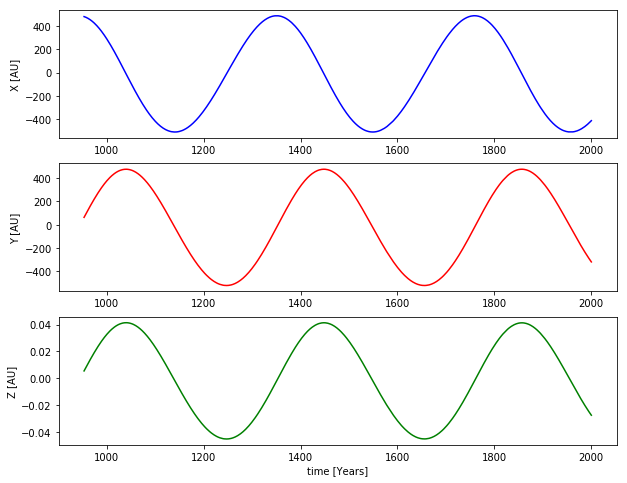

In [20]:
# PLOT THE DATA AS CURVES... 
fig = plt.figure(figsize=(10,8))

plt.subplot(3,1,1)
plt.plot(time,x,'b-')
plt.ylabel('X [AU]')

plt.subplot(3,1,2)
plt.plot(time,y,'r-')
plt.ylabel('Y [AU]')

plt.subplot(3,1,3)
plt.plot(time,z,'g-')
plt.xlabel('time [Years]')
plt.ylabel('Z [AU]')



plt.show()

In [35]:
duration_data = time[11620]
print('data duration = ', str(duration_data))
t_start = 0
t_end = time[11620] 
n_notes = 200
times = np.linspace(t_start,t_end,n_notes)

data duration =  2000.2215576171875


In [64]:
print('t_end = ',t_end)
stretch = 20/t_end
print('stretch = ',stretch)
times_sco = times*stretch
print('score duration = ', str(times_sco[-1]))
dt = times_sco[2]-times_sco[1]
print(dt)


t_end =  2000.2215576171875
stretch =  0.009998892334619914
score duration =  20.0
0.10050251256281408


In [62]:
x_data_range = np.linspace(min(x),max(x),80) #the number of points doesnt matter  
f_min = 200.
f_max = 800.
freq_range = np.linspace(f_min,f_max,80)
x_f = np.interp(x,x_data_range,freq_range)
print(x[0:10])
print(x_f[0:10])
pitches = np.interp(times,time,x_f)
print(pitches[0:10])

5370    480.325348
5380    477.650208
5390    475.527405
5400    473.709564
5410    471.109802
5420    467.787231
5430    464.949524
5440    462.573761
5450    459.935730
5460    455.247772
Name: x, dtype: float64
[795.52598625 793.91948315 792.64467558 791.55300707 789.99177099
 787.99646624 786.29233662 784.86561877 783.28140097 780.46613985]
[795.52598625 795.52598625 795.52598625 795.52598625 795.52598625
 795.52598625 795.52598625 795.52598625 795.52598625 795.52598625]


20.0


ValueError: x and y must have same first dimension, but have shapes (50,) and (626,)

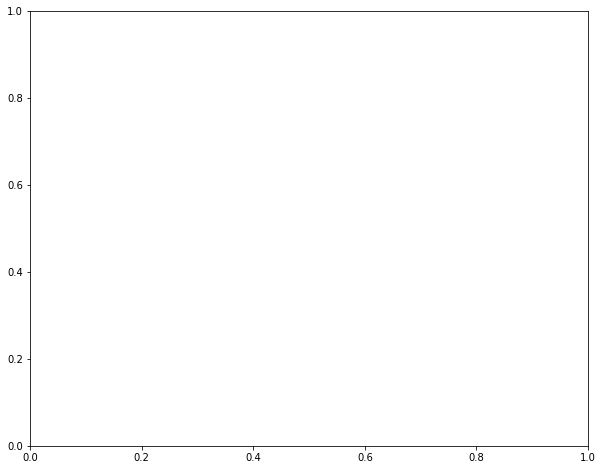

In [67]:
fig = plt.figure(figsize=(10,8))
time_x = np.linspace(times_sco[0],times_sco[-1],len(x_f))
print(times_sco[-1])

plt.plot(time_x,x_f,'r-')
plt.plot(times_sco,pitches,'ko')
for ind,t in enumerate(times_sco):
    plt.plot([t,t],[f_min,pitches[ind]],'k-', linewidth=0.5)
    
plt.xlabel('score time')
plt.ylabel('pitches (x)')